In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [9]:
content = """Date
Location_ISO_Code
Location
New_Cases
New_Deaths
New_Recovered
New_Active_Cases
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Location_Level
City_or_Regency
Province
Country
Continent
Island
Time_Zone
Special_Status
Total_Regencies
Total_Cities
Total_Districts
Total_Urban_Villages
Total_Rural_Villages
Area_(km2)
Population
Population_Density
Longitude
Latitude
New_Cases_per_Million
Total_Cases_per_Million
New_Deaths_per_Million
Total_Deaths_per_Million
Case_Fatality_Rate
Case_Recovered_Rate
Growth_Factor_of_New_Cases
Growth_Factor_of_New_Deaths"""
columns_list = content.split("\n")

In [10]:
data=pd.read_csv("/content/covid_19_indonesia_time_series_all.csv",header=0,names = columns_list,index_col=False)
data=data.set_index('Location')
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,39,-20,...,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,100.00%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,39,-18,...,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,0,2,...,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,0.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,39,-16,...,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20816 entries, DKI Jakarta to Sumatera Utara
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         20816 non-null  object 
 1   Location_ISO_Code            20816 non-null  object 
 2   New_Cases                    20816 non-null  int64  
 3   New_Deaths                   20816 non-null  int64  
 4   New_Recovered                20816 non-null  int64  
 5   New_Active_Cases             20816 non-null  int64  
 6   Total_Cases                  20816 non-null  int64  
 7   Total_Deaths                 20816 non-null  int64  
 8   Total_Recovered              20816 non-null  int64  
 9   Total_Active_Cases           20816 non-null  int64  
 10  Location_Level               20816 non-null  object 
 11  City_or_Regency              0 non-null      float64
 12  Province                     20202 non-null  object 
 13  Co

In [12]:
data = data[['Date','Location_ISO_Code','New_Cases','New_Deaths','Total_Cases','Total_Deaths','Total_Recovered','New_Active_Cases','Total_Active_Cases','Longitude','Latitude']]

In [13]:
data["Date"] = pd.to_datetime(data["Date"])

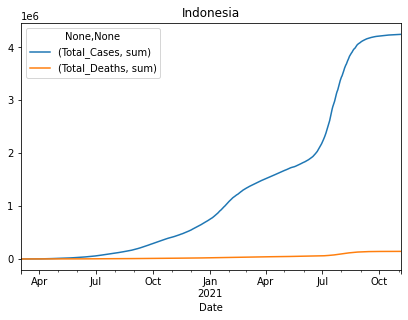

In [14]:
ConfirmedCases_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_IDN= ConfirmedCases_date_IDN.join(fatalities_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

Text(0, 0.5, 'Confirmed cases')

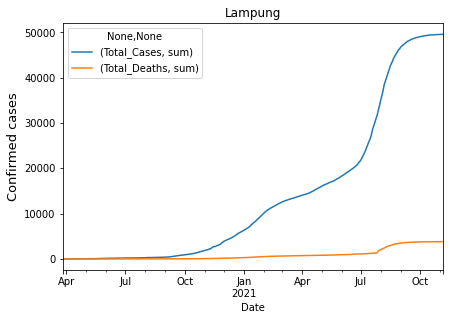

In [15]:
ConfirmedCases_date_LA= data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_LA = data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_LA = ConfirmedCases_date_LA.join(fatalities_date_LA)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_LA.plot(ax=plt.gca(), title='Lampung')
plt.ylabel("Confirmed cases", size=13)

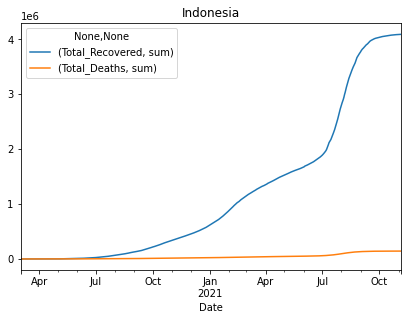

In [16]:
Total_Recovered_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_IDN= Total_Recovered_date_IDN.join(Total_Deaths_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

Text(0, 0.5, 'Confirmed cases')

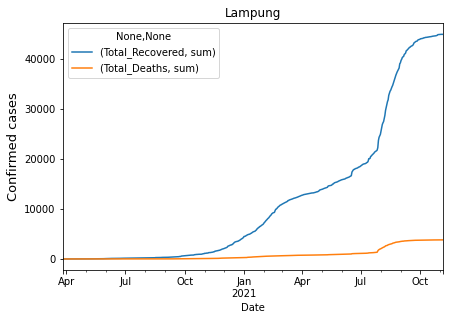

In [17]:
Total_Recovered_date_LA= data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_LA = data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_LA = Total_Recovered_date_LA.join(Total_Deaths_date_LA)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_LA.plot(ax=plt.gca(), title='Lampung')
plt.ylabel("Confirmed cases", size=13)

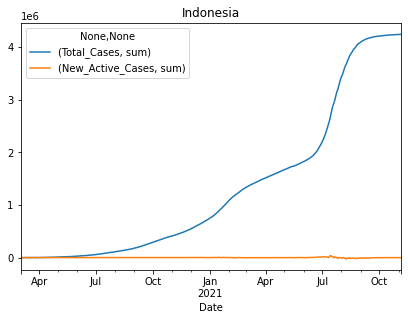

In [18]:
TotalCases_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
New_Active_Cases_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'New_Active_Cases':['sum']})
total_date_IDN= TotalCases_date_IDN.join(New_Active_Cases_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

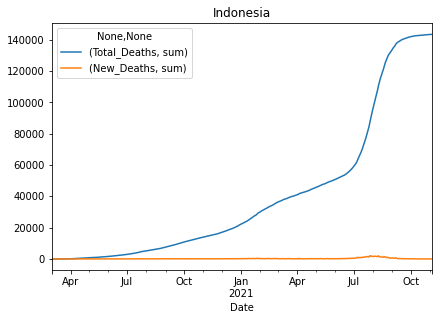

In [19]:
Total_Deaths_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
New_Deaths_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'New_Deaths':['sum']})
total_date_IDN= Total_Deaths_date_IDN.join(New_Deaths_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# **Prediction**

In [20]:
data1 = pd.read_csv("/content/covid_19_indonesia_time_series_all.csv",header=0,names = columns_list,index_col=False)
data1 = data1.set_index('Location')
data1.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,39,-20,...,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,100.00%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,39,-18,...,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,0,2,...,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,0.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,39,-16,...,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.0


In [21]:
data1= data1.replace([np.inf, -np.inf], np.nan)
data1 = data1.fillna(0)
data1

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,39,-20,...,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,100.00%,0.00
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,39,-18,...,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,95.12%,1.00
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,0.00
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,0,2,...,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,0.00%,0.00
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,39,-16,...,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,90.70%,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sulawesi Tengah,11/5/2021,ID-ST,11,0,0,11,47056,1595,45307,154,...,121.201093,-1.004137,3.72,15921.14,0.00,539.66,53.97,3.39%,96.28%,1.57
Sulawesi Utara,11/5/2021,ID-SA,3,1,1,1,34636,1039,33162,435,...,124.521240,1.259638,1.14,13110.34,0.38,393.28,39.33,3.00%,95.74%,1.50
Sumatera Barat,11/5/2021,ID-SB,1,0,3,-2,89786,2147,87424,215,...,100.465062,-0.850253,0.18,16267.80,0.00,389.00,38.90,2.39%,97.37%,1.00


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [23]:
data1 = FunLabelEncoder(data1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20816 entries, DKI Jakarta to Sumatera Utara
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         20816 non-null  int64  
 1   Location_ISO_Code            20816 non-null  int64  
 2   New_Cases                    20816 non-null  int64  
 3   New_Deaths                   20816 non-null  int64  
 4   New_Recovered                20816 non-null  int64  
 5   New_Active_Cases             20816 non-null  int64  
 6   Total_Cases                  20816 non-null  int64  
 7   Total_Deaths                 20816 non-null  int64  
 8   Total_Recovered              20816 non-null  int64  
 9   Total_Active_Cases           20816 non-null  int64  
 10  Location_Level               20816 non-null  int64  
 11  City_or_Regency              20816 non-null  float64
 12  Province                     20816 non-null  int64  
 13  Co

# **New Cases**

In [24]:
from sklearn.model_selection import train_test_split
Y = data1['New_Cases']
X = data1.drop(columns=['New_Cases'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [25]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (18734, 35)
Y train shape:  (18734,)
X test shape:  (2082, 35)
Y test shape:  (2082,)


In [26]:
from sklearn import metrics
from sklearn import tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

clf = tree.DecisionTreeClassifier()
clf  = clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)

akurasi = metrics.accuracy_score(Y_test,Y_pred)
print(akurasi)

0.4099279423538831


In [27]:
from sklearn.tree import DecisionTreeClassifier

dtcla = DecisionTreeClassifier(random_state=None)

dtcla.fit(X_train, Y_train)

Y_predict = dtcla.predict(X_test)

In [28]:
X_test

,Date,Location_ISO_Code,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Sulawesi Tenggara,614,27,0,5,6,19848,511,18570,767,1,...,122.070311,-4.124689,4.17,7531.13,0.00,193.89,19.39,475,5554,0.39
Sumatera Selatan,255,30,0,2,-2,18,2,4,12,1,...,104.169465,-3.216212,0.00,2.19,0.00,0.24,0.02,212,587,1.00
Riau,603,24,5,53,72,2273,42,1119,1112,1,...,101.805109,0.511648,21.40,374.21,0.82,6.91,0.69,143,1670,1.21
Jawa Barat,577,7,3,169,20,12353,307,6842,5204,1,...,107.603708,-6.920432,4.25,273.53,0.07,6.80,0.68,467,2031,0.70
Kalimantan Barat,488,11,11,108,163,16227,409,14078,1740,1,...,111.121178,-0.086475,52.00,2992.36,2.03,75.42,7.54,470,4844,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Banten,450,4,9,310,2819,87712,1555,55380,30777,1,...,106.109004,-6.456736,292.66,8180.28,0.84,145.02,14.50,135,2616,0.92
Maluku,258,18,3,2,-3,7437,115,6974,348,1,...,129.576792,-3.192572,1.08,4026.32,1.62,62.26,6.23,113,5575,0.08
Kalimantan Utara,120,16,0,3,12,856,9,732,115,1,...,116.218879,2.891013,23.13,1320.16,0.00,13.88,1.39,63,4719,1.25


# **New Deaths**

In [29]:
from sklearn.model_selection import train_test_split
Y1 = data1['New_Deaths']
X1 = data1.drop(columns=['New_Deaths'])
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=9)

In [30]:
print('X1 train shape: ', X1_train.shape)
print('Y1 train shape: ', Y1_train.shape)
print('X1 test shape: ', X1_test.shape)
print('Y1 test shape: ', Y1_test.shape)

X1 train shape:  (18734, 35)
Y1 train shape:  (18734,)
X1 test shape:  (2082, 35)
Y1 test shape:  (2082,)


In [31]:
from sklearn import metrics
from sklearn import tree
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=1) 

clf = tree.DecisionTreeClassifier()
clf  = clf.fit(X1_train,Y1_train)

Y1_pred = clf.predict(X1_test)

akurasi = metrics.accuracy_score(Y1_test,Y1_pred)
print(akurasi)

0.8707766212970376


In [32]:
from sklearn.tree import DecisionTreeClassifier

dtcla = DecisionTreeClassifier(random_state=None)

dtcla.fit(X1_train, Y1_train)

Y1_predict = dtcla.predict(X1_test)

data1=X1_test
data1

,Date,Location_ISO_Code,New_Cases,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Sulawesi Tenggara,614,27,11,5,6,19848,511,18570,767,1,...,122.070311,-4.124689,4.17,7531.13,0.00,193.89,19.39,475,5554,0.39
Sumatera Selatan,255,30,0,2,-2,18,2,4,12,1,...,104.169465,-3.216212,0.00,2.19,0.00,0.24,0.02,212,587,1.00
Riau,603,24,130,53,72,2273,42,1119,1112,1,...,101.805109,0.511648,21.40,374.21,0.82,6.91,0.69,143,1670,1.21
Jawa Barat,577,7,192,169,20,12353,307,6842,5204,1,...,107.603708,-6.920432,4.25,273.53,0.07,6.80,0.68,467,2031,0.70
Kalimantan Barat,488,11,282,108,163,16227,409,14078,1740,1,...,111.121178,-0.086475,52.00,2992.36,2.03,75.42,7.54,470,4844,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Banten,450,4,3138,310,2819,87712,1555,55380,30777,1,...,106.109004,-6.456736,292.66,8180.28,0.84,145.02,14.50,135,2616,0.92
Maluku,258,18,2,2,-3,7437,115,6974,348,1,...,129.576792,-3.192572,1.08,4026.32,1.62,62.26,6.23,113,5575,0.08
Kalimantan Utara,120,16,15,3,12,856,9,732,115,1,...,116.218879,2.891013,23.13,1320.16,0.00,13.88,1.39,63,4719,1.25


In [33]:
submission = pd.DataFrame({'New_Cases':Y_predict,'New_Deaths':Y1_predict})
submission.head(100)

,New_Cases,New_Deaths
0,11,0
1,0,0
2,113,5
3,207,3
4,253,11
...,...,...
95,0,0
96,4,0
97,0,0
98,183,13


In [34]:
print("New Cases :",sum(Y_predict))
print("New Death :",sum(Y1_predict))

New Cases : 2585922
New Death : 84175


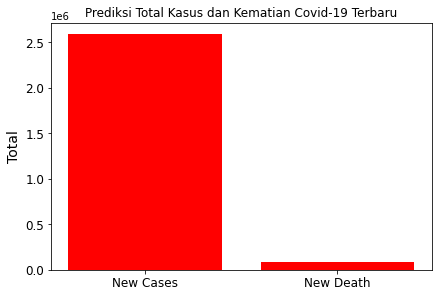

In [35]:
a=['New Cases', 'New Death']
b=[sum(Y_predict),sum(Y1_predict)]

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.bar(a,b, color='red')

plt.title('Prediksi Total Kasus dan Kematian Covid-19 Terbaru', size=12)
plt.ylabel('Total', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()